# Perceptron

In [1]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
X0 = np.array([
    [-2, 4],
    [4, 1],
    [1, 6],
    [2, 4],
    [6, 2]
])

# Add a bias term -1 into the data set
X = np.array([
    [-2,4,-1],
    [4,1,-1],
    [1, 6, -1],
    [2, 4, -1],
    [6, 2, -1],

])

y = np.array([-1,-1,1,1,1])

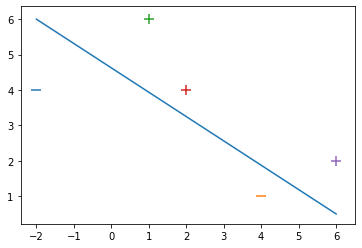

In [3]:
for d, sample in enumerate(X):
    # Plot the negative samples
    if d < 2:
        plt.scatter(sample[0], sample[1], s=120, marker='_', linewidths=2)
    # Plot the positive samples
    else:
        plt.scatter(sample[0], sample[1], s=120, marker='+', linewidths=2)

# Print a possible hyperplane, that is seperating the two classes. The line is only to see it is seperable.
plt.plot([-2,6],[6,0.5])  

### Perceptron, Stochastic Gradient Descent

In [4]:
def perceptron_sgd(X, Y):
    w = np.zeros(len(X[0]))  #Initialize the weight vector for the perceptron with zeros
    eta = 1                  #Set the learning rate to 1
    epochs = 20              #Set the number of epochs

    for t in range(epochs):
        for i, x in enumerate(X):
            if (np.dot(X[i], w)*Y[i]) <= 0:
                w = w + eta*X[i]*Y[i]

    return w

w = perceptron_sgd(X,y)
print(w)

[ 2.  3. 13.]


Plot the dataset to see that is is linearly seperable.

### Check how many iterations are needed, until all sampels are classified right

In [5]:
def perceptron_sgd_plot(X, Y):
    '''
    train perceptron and plot the total loss in each epoch.
    
    :param X: data samples
    :param Y: data labels
    :return: weight vector as a numpy array
    '''
    w = np.zeros(len(X[0]))
    eta = 1
    n = 30
    errors = []

    for t in range(n):
        total_error = 0
        for i, x in enumerate(X):
            if (np.dot(X[i], w)*Y[i]) <= 0:
                total_error += (np.dot(X[i], w)*Y[i])
                w = w + eta*X[i]*Y[i]
        errors.append(total_error*-1)
        
    plt.plot(errors)
    plt.xlabel('Epoch')
    plt.ylabel('Total Loss')
    
    return w

[ 2.  3. 13.]


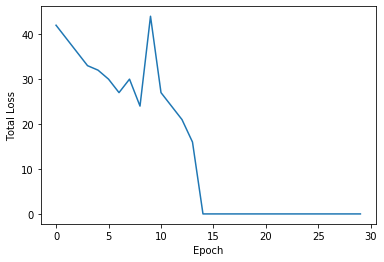

In [6]:
print(perceptron_sgd_plot(X,y))

### Plot the samples including test samples and the hyperplane.

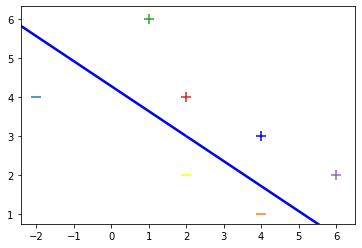

In [7]:
for d, sample in enumerate(X):
    # Plot the negative samples
    if d < 2:
        plt.scatter(sample[0], sample[1], s=120, marker='_', linewidths=2)
    # Plot the positive samples
    else:
        plt.scatter(sample[0], sample[1], s=120, marker='+', linewidths=2)

# Add our test samples

plt.scatter(2,2, s=120, marker='_', linewidths=2, color='yellow')
plt.scatter(4,3, s=120, marker='+', linewidths=2, color='blue')

# Print the hyperplane calculated by perceptron_sgd()
x2=[w[0],w[1],-w[1],w[0]]
x3=[w[0],w[1],w[1],-w[0]]

x2x3 =np.array([x2,x3])
X,Y,U,V = zip(*x2x3)
ax = plt.gca()
ax.quiver(X,Y,U,V,scale=1, color='blue')

Lets classify the samples in our data set by hand now, to check if the perceptron learned properly:

First sample (−2,4), supposed to be negative:

−2∗2+4∗3−13=sign(−5)=−1
Second sample (4,1), supposed to be negative:

4∗2+1∗3−13=sign(−2)=−1
Third sample (1,6), supposed to be positive:

1∗2+6∗3−13=sign(7)=+1
Fourth sample (2,4), supposed to be positive:

2∗2+4∗3−13=sign(3)=+1
Fifth sample (6,2), supposed to be positive:

6∗2+2∗3−13=sign(5)=+1
Lets define two test samples now, to check how well our perceptron generalizes to unseen data:

First test sample (2,2), supposed to be negative:

2∗2+2∗3−13=sign(−3)=−1
Second test sample (4,3), supposed to be positive:

4∗2+3∗3−13=sign(4)=+1
Both samples are classified right. To check this geometrically, lets plot the samples including test samples and the hyperplane.